# Physics 515 assignment 2
Brittany Howard

Consider an experiment that measures times $y_i$ between successive light flashes. Model these times as outcomes of a random variable  $Y = X  +  T$, in which   which follows the uniform distribution [0, $d$] and   follows the exponential distribution, with mean lifetime  $\tau$ = 1. You calculated the pdf  $g(y|d)$ for assignment #1. The null hypothesis has  $d = 4$ and there is a single alternative hypothesis with  $d = 5$. From the Bayesian viewpoint, the two hypotheses are deemed equally likely prior to the measurement.


The most powerful discriminator between hypotheses is  the likelihood ratio, $r$  . We will use its logarithm as the test statistic for testing the null hypothesis:

$\ln r = \sum^n_{i=1} \ln g(y_i|d=4) - \sum^n_{i=1}\ln g(y_i|d=5)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
# set parameters for everything
num_fake_data = 10000     # number of sample datasets for each hypothesis
n = 40                    # number of events in each data set 
d_nums = [4, 5]           # values of d to test
tau = 1                   # tau for the exponential random variable
binsize = 0.5             # bin size for the histogram
mini = -10                # minimum for histogram
maxi = 10                 # maximum for histogram

## Question 1
Evaluate the data test statistic value for the dataset posted for the assignment ( $n$ = 40).

In [2]:
# load data
observed_data = np.loadtxt('datafile.txt')

In [3]:
def get_gy(yi, d):  # for evaluating g(y|d)
    # from assignment one
    # don't need to worry about region where y < 0; there's 0 probability of seeing that data
    if yi <= d:
        gy = (1 - np.exp(-yi)) / d
    else:  # yi > d
        gy = (np.exp(d - yi) - np.exp(-yi)) / d
    return gy

In [4]:
def get_lnr(data):
    term1 = 0
    term2 = 0
    
    for yi in data:
        term1 += np.log(get_gy(yi, d=d_nums[0]))
        term2 += np.log(get_gy(yi, d=d_nums[1]))
        
    lnr = term1 - term2

    return lnr

In [5]:
# get the test statistic for the observed data
observed_testStat = get_lnr(observed_data)
print('The value of the test statistic for our observed data is {}'.format(observed_testStat))

The value of the test statistic for our observed data is 1.7729743068969128


## Question 2
Find sampling distributions for the test statistic by generating 10,000 toy samples for each hypothesis (produce each toy sample with 40 events). Plot normalized histograms of the test statistic for these toy samples, with bin size 0.5. These represent the sampling distributions and an example is shown below.

In [43]:
def make_fake_data(n, d):
    x = np.random.uniform(high=d, low=0, size=n)
    t = np.random.exponential(scale=tau, size=n)
    fake_data = x + t
    return fake_data

In [44]:
test_stat_d4 = []
test_stat_d5 = []

for d in d_nums:
    for num in range(0,num_fake_data):
        # generate one set of fake data
        fake_data = make_fake_data(n, d)

        # calculate the test statstic and append to the correct list
        if d == 4:
            test_stat_d4.append(get_lnr(fake_data))
        else:
            test_stat_d5.append(get_lnr(fake_data))

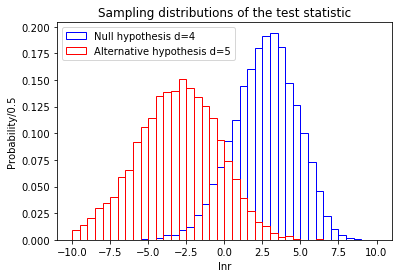

In [61]:
# make the histogram
plt.hist(test_stat_d4, 
         normed=True, 
         label='Null hypothesis d=4', 
         edgecolor='blue', fill='',
         bins=np.arange(mini, maxi+binsize, binsize))
plt.hist(test_stat_d5, 
         normed=True,
         label='Alternative hypothesis d=5',
         edgecolor='red', fill='',
         bins=np.arange(mini, maxi+binsize, binsize))
plt.legend()
# set bin size
plt.title('Sampling distributions of the test statistic')
plt.ylabel('Probability/0.5')
plt.xlabel('lnr')

## Question 3

Frequentist Test: Calculate the p-value to test the null hypothesis. Is the null hypothesis rejected at the 95% confidence level?

To calculate the p-value, all we need to do is see what fraction of our sample values of $\ln r$ are lower than our actual value from the observed data, 1.7729.

For the second part, we need to calculate the cutoff value of $\ln r$ and see if our observed value is more anomalous than that. Given the histogram above, we see that more anomalous means a lower value of $\ln r$, so if our value is lower than that of the cutoff value, we can say that the null hypothesis is rejected at the 95% confidence level. To find the cutoff value, we just need to sort our values of $\ln r$ for $d=4$ by value, and then use indexing to find the 500th lowest value.

In [47]:
# calculate p-value
test_stat_d4.sort()  # sort from low to high
num_lower = np.where(test_stat_d4 <= observed_testStat)
print(num_lower)

(array([   0,    1,    2, ..., 3226, 3227, 3228]),)


Okay, so that didn't work exactly how I wanted it to, code-wise, but in the interest of saving time, I won't try to fully automate this now. We can just say that the p-value is the fraction of test statistic values as anomalous or more anomalous than our observed value, which will be 32228/10000, which give us a **p-value of 3.22**.

Now, let's find the cutoff value:

In [49]:
cutoff = test_stat_d4[500]
print(cutoff)

-0.897452707273


Since we observed a test statistic equal to 1.7729 and it is not lower (more anomalous) than our cutoff value of -0.8975, **we cannot say that the null hypothesis is rejected at the 95% confidence level**.

## Question 4
Bayesian Test: Calculate the posterior probability for the null hypothesis. To estimate the probability densities for the sampling distributions at the value of the data test statistic, count the number of toy samples that have a test statistic within 0.2 of the data test statistic value.

To get the posterior probability, we follow this formula:

$P(H_0|x) = \frac{1}{1+1/\text{posterior_odds}}$,

where the posterior odds are given by the likelihood ratio divided by the prior odds. It is given in the assignment that the prior odds is equal to one, so we can ignore this piece and simply calculate the likelihood ratio, defined as $\frac{P(x|H_0)}{P(x|H_1)}$. This can be numerically estimated as follows:

In [59]:
top = ((observed_testStat - 0.2 < test_stat_d4) & (test_stat_d4 < observed_testStat + 0.2)).sum()
bottom = ((observed_testStat - 0.2 < test_stat_d5) & (test_stat_d5 < observed_testStat + 0.2)).sum()
posterior_odds = top/bottom
    
posterior_probability = 1 / (1 + 1 / posterior_odds)
print('Posterior probability for the null hypothesis is {}'.format(posterior_probability))

Posterior probability for the null hypothesis is 0.8530183727034121
